In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/Volumes/Storage/Training/ML/data/MNIST',one_hot=True)

Extracting /Volumes/Storage/Training/ML/data/MNIST/train-images-idx3-ubyte.gz
Extracting /Volumes/Storage/Training/ML/data/MNIST/train-labels-idx1-ubyte.gz
Extracting /Volumes/Storage/Training/ML/data/MNIST/t10k-images-idx3-ubyte.gz
Extracting /Volumes/Storage/Training/ML/data/MNIST/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
type(mnist.train.images)

numpy.ndarray

In [7]:
mnist.train.images.shape

(55000, 784)

In [9]:
mnist.train.images[2]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [10]:
mnist.train.images[2].shape

(784,)

In [11]:
28*28

784

In [12]:
mnist.train.images[2].reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [13]:
sample = mnist.train.images[2].reshape(28,28)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

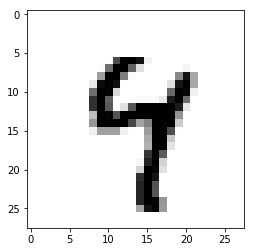

In [16]:
plt.imshow(sample,cmap='Greys')

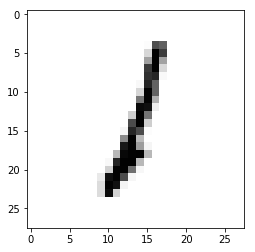

In [17]:
sample = mnist.train.images[123].reshape(28,28)
plt.imshow(sample,cmap='Greys')

In [18]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [57]:
n_classes = 10
n_samples = mnist.train.num_examples

In [58]:
n_samples

55000

In [21]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256

In [28]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: Dict of bias values
    '''
    # First Hidden Layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU(X * W + B) ->f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Secound Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output Layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [23]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [24]:
weights

{'h1': <tensorflow.python.ops.variables.Variable at 0x118cf2240>,
 'h2': <tensorflow.python.ops.variables.Variable at 0x10c221a58>,
 'out': <tensorflow.python.ops.variables.Variable at 0x10c22c2e8>}

In [26]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [27]:
x = tf.placeholder('float',[None,n_input])
y = tf.placeholder('float',[None,n_classes])

In [29]:
pred = multilayer_perceptron(x,weights,biases)

In [30]:
pred

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [31]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred,y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

** Training the Model **

In [34]:
t = mnist.train.next_batch(10)

In [35]:
t

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32),
 array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]]))

In [39]:
print(len(t))
print(len(t[0]))
print(len(t[1]))

2
10
10


In [40]:
28**2

784

In [44]:
t = mnist.train.next_batch(1)

In [45]:
Xsamp, ysamp = t

In [48]:
Xsamp

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

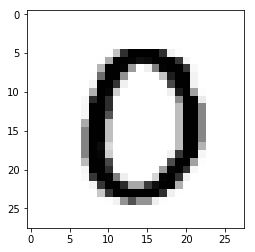

In [47]:
plt.imshow(Xsamp.reshape(28,28),cmap='Greys')

In [49]:
ysamp

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

## Run the Session

In [52]:
sess = tf.InteractiveSession()

In [53]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [54]:
init = tf.global_variables_initializer()

In [55]:
sess.run(init)

In [59]:
# 15 loops
for epoch in range(training_epochs):
    # Cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost += c/total_batch
        
    print('Epoch: {} cost{:.4f}'.format(epoch+1,avg_cost))
print('Model has completed {} Epochs of training'.format(training_epochs))
        

Epoch: 1 cost157.5075
Epoch: 2 cost41.7736
Epoch: 3 cost26.0860
Epoch: 4 cost18.1932
Epoch: 5 cost13.2173
Epoch: 6 cost9.8224
Epoch: 7 cost7.3859
Epoch: 8 cost5.6446
Epoch: 9 cost4.1459
Epoch: 10 cost3.1667
Epoch: 11 cost2.4296
Epoch: 12 cost1.7669
Epoch: 13 cost1.3446
Epoch: 14 cost1.0356
Epoch: 15 cost0.9008
Model has completed 15 Epochs of training


## Model Evaluations

In [60]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [61]:
correct_predictions

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

In [62]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [63]:
correct_predictions = tf.cast(correct_predictions,'float')

In [64]:
correct_predictions

<tf.Tensor 'Cast_1:0' shape=(?,) dtype=float32>

In [65]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [66]:
accuracy = tf.reduce_mean(correct_predictions)

In [67]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [68]:
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [69]:
mnist.test.labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [70]:
mnist.test.images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [71]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.94590002